#                                           Term Project 
###                        Google store analytics customer revenue prediction.

## Read data into Jupyter notebook, using pandas to import data into a data frame

In [1]:
import pandas as pd
import numpy as np
import os
import ast
import json # to convert json in df
from pandas.io.json import json_normalize # to normalize the json file

In [2]:
os.chdir('/Users/hp/Desktop/Datascience/TermProject')

In [3]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\Datascience\\TermProject'

In [4]:
df = pd.read_csv("data (1).csv")
df['date'] = pd.to_datetime(df['date'].apply(lambda x: str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[6:]))

In [5]:
df.columns

Index(['channelGrouping', 'customDimensions', 'date', 'device',
       'fullVisitorId', 'geoNetwork', 'hits', 'socialEngagementType',
       'trafficSource', 'visitId', 'visitNumber', 'visitStartTime',
       'totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'totals_visits'],
      dtype='object')

In [6]:
df['customDimensions'].value_counts()

[{'index': '4', 'value': 'North America'}]      9288
[{'index': '4', 'value': 'EMEA'}]               3775
[]                                              3605
[{'index': '4', 'value': 'APAC'}]               2566
[{'index': '4', 'value': 'South America'}]       468
[{'index': '4', 'value': 'Central America'}]     298
Name: customDimensions, dtype: int64

## removing all the extra characters from customDimensions

In [7]:
a=[]
for index,h in df['customDimensions'].iteritems():
    h1=h.replace('[]',"{'index': 'None', 'value': 'None'}")
    h2=h1.replace('[','')
    h3=h2.replace(']','')
    h4=ast.literal_eval(h3)
    a.append(h4)

In [8]:
customDimension = pd.Series(a)
df.drop(['customDimensions'],axis=1,inplace=True)
df1=df.merge(pd.DataFrame(customDimension), right_index=True, left_index=True)
df1=df1.rename(columns = {0:'customDimensions'})

## converting the columns of Python object datatype into json string format

In [9]:
def jsondumps(data):
    data1=ast.literal_eval(data)
    h = json.dumps(data1)
    return h
def jsondumps1(data):
    h = json.dumps(data)
    return h

In [10]:
def todict(dic, key, value):
    if key in dic:
        dic[key].append(value)
    else:
        dic[key] = [value]
    return dic
def resolve_json(hitsdic, hits_json, key='NoneName'):
    if type(hits_json) == list:
        if len(hits_json) == 0:
            pass
        else:
            for subjson in hits_json:
                hitsdic = resolve_json(hitsdic, subjson)
    elif type(hits_json) == dict:
        for i in hits_json.keys():
            hitsdic = resolve_json(hitsdic, hits_json[i],i)
    else:
        hitsdic = todict(hitsdic, key, hits_json)
    return hitsdic
def complex_replace(x):
    dic = {}
    return resolve_json(dic, json.loads(x.replace('\'','\"'). \
                                        replace('TRUE','true'). \
                                        replace('True','true'). \
                                        replace('FALSE','false'). \
                                        replace('False','false'). \
                                        replace(', \"',', !&~'). \
                                        replace('\", ','!&~, '). \
                                        replace('\": ','!&~: '). \
                                        replace(': \"',': !&~'). \
                                        replace(' {\"',' {!&~'). \
                                        replace('\"}, ','!&~}, '). \
                                        replace('[{\"','[{!&~'). \
                                        replace('\"}]','!&~}]'). \
                                        replace('\"','_'). \
                                        replace('!&~','\"'). \
                                        encode('gbk','ignore'). \
                                        decode('utf-8','ignore'). \
                                        replace('\\','')))

In [11]:
len(df1['hits'].unique())

19554

## Normalized the Hits columns

In [12]:
hits_columns = json_normalize(df1['hits'].apply(complex_replace))
hits_columns

,action_type,affiliation,contentGroup1,contentGroup2,contentGroup3,contentGroup4,contentGroup5,contentGroupUniqueViews1,contentGroupUniqueViews2,contentGroupUniqueViews3,...,step,time,transactionCoupon,transactionId,transactionRevenue,transactionShipping,transactionTax,type,v2ProductCategory,v2ProductName
0,[0],NaN,[(not set)],[Bags],[(not set)],[(not set)],[(not set)],NaN,[1],NaN,...,[1],[0],NaN,NaN,NaN,NaN,NaN,[PAGE],"[Home/Drinkware/Water Bottles and Tumblers/, H...","[Google 17oz Stainless Steel Sport Bottle, 26 ..."
1,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,NaN,NaN,...,"[1, 1]","[0, 27844]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[(not set), (not set), (not set), (not set), (...",[Google Men_s 100% Cotton Short Sleeve Hero Te...
2,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), Apparel]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 38153]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[Home/Apparel/Kid_s/, Home/Apparel/Kid_s/, Hom...","[Google Toddler Short Sleeve Tee Red, Google Y..."
3,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), Brands]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 1087]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[Home/Shop by Brand/YouTube/, Home/Shop by Bra...","[YouTube Custom Decals, 22 oz YouTube Bottle I..."
4,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), Apparel]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 52349]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[(not set), (not set)]",[Google Women_s Short Sleeve Hero Tee Sky Blue...
5,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), Apparel]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 12090]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[Home/Apparel/Headgear/, Home/Apparel/Headgear/]","[Google Twill Cap, Google Blackout Cap]"
6,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), Electronics]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 9424]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[Home/Electronics/Electronics Accessories/, Ho...","[Recycled Mouse Pad, Google Device Stand, Waze..."
7,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), Apparel]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 14759]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]",[(not set)],[Google Men_s 100% Cotton Short Sleeve Hero Te...
8,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), Electronics]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 33741]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[Home/Electronics/Electronics Accessories/, Ho...","[Google Device Stand, Waze Mobile Phone Vent M..."
9,"[0, 0]",NaN,"[(not set), (not set)]","[Apparel, (not set)]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 32348]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[Home/Apparel/, Home/Apparel/, Home/Apparel/, ...",[Google Men_s 100% Cotton Short Sleeve Hero Te...


In [13]:
hits_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 87 columns):
action_type                       19994 non-null object
affiliation                       196 non-null object
contentGroup1                     19994 non-null object
contentGroup2                     19994 non-null object
contentGroup3                     19994 non-null object
contentGroup4                     19994 non-null object
contentGroup5                     19994 non-null object
contentGroupUniqueViews1          1381 non-null object
contentGroupUniqueViews2          11814 non-null object
contentGroupUniqueViews3          1749 non-null object
currencyCode                      11914 non-null object
dataSource                        11214 non-null object
domContentLoadedTime              222 non-null object
domInteractiveTime                222 non-null object
domLatencyMetricsSample           222 non-null object
domainLookupTime                  161 non-null object
eventAc

### chose the best possible columns form hits_columns for the prediction and preprocessed the columns of our interset. Added the values in the list and formed a single value.

In [14]:
e = []
h=pd.DataFrame(hits_columns)
for i,r in h['affiliation'].iteritems():
    if isinstance(r,list):
        r1=r[0]
        e.append(r1)
    else:
        e.append(0)
e1 = pd.Series(e, name='affiliation')

In [15]:
sum1=0
e2= []
for i,r in h['localProductRevenue'].iteritems():
    if isinstance(r,list):
        for a in r:
            sum1 = sum1 + int(a)
        e2.append(sum1)
        sum1=0
    else:
        e2.append(0)
e2=pd.Series(e2, name='localProductRevenue')

In [16]:
sum1=0
e3= []
for i,r in h['productRevenue'].iteritems():
    if isinstance(r,list):
        for a in r:
            sum1 = sum1 + int(a)
        e3.append(sum1)
        sum1=0
    else:
        e3.append(0)
e3=pd.Series(e3, name='productRevenue')

In [17]:
sum1=0
e4= []
for i,r in h['transactionRevenue'].iteritems():
    if isinstance(r,list):
        for a in r:
            sum1 = sum1 + int(a)
        e4.append(sum1)
        sum1=0
    else:
        e4.append(0)
e4=pd.Series(e4, name='transactionRevenue')
e4[4639]

675960000

In [18]:
sum1=0
e5= []
for i,r in h['transactionShipping'].iteritems():
    if isinstance(r,list):
        for a in r:
            sum1 = sum1 + int(a)
        e5.append(sum1)
        sum1=0
    else:
        e5.append(0)
e5=pd.Series(e5, name='transactionShipping')

### converted the below columns from object to json string

In [19]:
h1=df1['customDimensions'].apply(jsondumps1)
h2=df1['trafficSource'].apply(jsondumps)
h3=df1['geoNetwork'].apply(jsondumps)
h4=df1['device'].apply(jsondumps)

In [20]:
df1.drop(['customDimensions', 'device', 'geoNetwork','trafficSource'],axis=1,inplace=True)
df1=df1.merge(pd.DataFrame(h1), right_index=True, left_index=True)
df1=df1.merge(pd.DataFrame(h2), right_index=True, left_index=True)
df1=df1.merge(pd.DataFrame(h3), right_index=True, left_index=True)
df1=df1.merge(pd.DataFrame(h4), right_index=True, left_index=True)

In [21]:
df1.head()
df1.to_csv('data2.csv')

### for the below mentioned columns converted the json sting, normalized and put in df

In [22]:
columns = ['device', 'geoNetwork', 'customDimensions', 'trafficSource'] # Columns that have json format

#dir_path = "/Users/hp/Desktop/Datascience/TermProject/" # you can change to your local 

#Code to transform the json format columns in table
def json_read(csv_path='/Users/hp/Desktop/Datascience/TermProject/data2.csv', nrows=None):
    #joining the [ path + df received]
    #data_frame = dir_path + df
    
    #Importing the dataset
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in columns}, # loading the json columns properly
                     dtype={'fullVisitorId': 'str'},
                     nrows=nrows) # transforming this column to string
    for column in columns:        #loop to finally transform the columns in data frame
        #It will normalize and set the json to a table
        column_as_df = json_normalize(df[column]) 
        # here will be set the name using the category and subcategory of json columns
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns] 
        # after extracting the values, let drop the original columns
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    return df # returning the df after importing and transforming

In [23]:
df1 = json_read() 
df1.drop(['Unnamed: 0'],axis=1,inplace=True)
df1.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'hits',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'totals_visits', 'device.browser',
       'device.browserSize', 'device.browserVersion', 'device.deviceCategory',
       'device.flashVersion', 'device.isMobile', 'device.language',
       'device.mobileDeviceBranding', 'device.mobileDeviceInfo',
       'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
       'device.mobileInputSelector', 'device.operatingSystem',
       'device.operatingSystemVersion', 'device.screenColors',
       'device.screenResolution', 'geoNetwork.city', 'geoNetwork.cityId',
       'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoN

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 60 columns):
channelGrouping                                      20000 non-null object
date                                                 20000 non-null object
fullVisitorId                                        20000 non-null object
hits                                                 20000 non-null object
socialEngagementType                                 20000 non-null object
visitId                                              20000 non-null int64
visitNumber                                          20000 non-null int64
visitStartTime                                       20000 non-null int64
totals_bounces                                       9873 non-null float64
totals_hits                                          20000 non-null int64
totals_newVisits                                     15088 non-null float64
totals_pageviews                                     19999 non-null f

In [25]:
result = pd.concat([e1, e2, e3, e4,e5], axis=1)
result

,affiliation,localProductRevenue,productRevenue,transactionRevenue,transactionShipping
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,0


Added all the columns of our interset into single DF

In [26]:
df1 = pd.concat([df1, result], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 65 columns):
channelGrouping                                      20000 non-null object
date                                                 20000 non-null object
fullVisitorId                                        20000 non-null object
hits                                                 20000 non-null object
socialEngagementType                                 20000 non-null object
visitId                                              20000 non-null int64
visitNumber                                          20000 non-null int64
visitStartTime                                       20000 non-null int64
totals_bounces                                       9873 non-null float64
totals_hits                                          20000 non-null int64
totals_newVisits                                     15088 non-null float64
totals_pageviews                                     19999 non-null f

In [27]:
df1.drop(['hits'],axis=1,inplace=True)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 64 columns):
channelGrouping                                      20000 non-null object
date                                                 20000 non-null object
fullVisitorId                                        20000 non-null object
socialEngagementType                                 20000 non-null object
visitId                                              20000 non-null int64
visitNumber                                          20000 non-null int64
visitStartTime                                       20000 non-null int64
totals_bounces                                       9873 non-null float64
totals_hits                                          20000 non-null int64
totals_newVisits                                     15088 non-null float64
totals_pageviews                                     19999 non-null float64
totals_sessionQualityDim                             9120 non-null f

### Preprocess data: Explore data, check for missing data and imputing nan values with 0

In [29]:

def missing_values(data):
    total = data.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (data.isnull().sum() / data.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total columns at least one Values: ")
    print (df[~(df['Total'] == 0)]) # Returning values of nulls different of 0
    print("\n Total of Sales % of Total: ", round((df1[df1['totals_transactionRevenue'] != np.nan]['totals_transactionRevenue'].count() / len(df1['totals_transactionRevenue']) * 100),4))
    
    return 

In [30]:
missing_values(df1)

Total columns at least one Values: 
                                              Total  Percent
totals_transactionRevenue                     19807   99.035
totals_totalTransactionRevenue                19807   99.035
totals_transactions                           19804   99.020
trafficSource.adContent                       19479   97.395
trafficSource.adwordsClickInfo.slot           19370   96.850
trafficSource.adwordsClickInfo.adNetworkType  19370   96.850
trafficSource.adwordsClickInfo.page           19370   96.850
trafficSource.adwordsClickInfo.isVideoAd      19370   96.850
trafficSource.adwordsClickInfo.gclId          19367   96.835
trafficSource.referralPath                    13896   69.480
trafficSource.isTrueDirect                    13667   68.335
trafficSource.keyword                         13210   66.050
totals_sessionQualityDim                      10880   54.400
totals_bounces                                10127   50.635
totals_timeOnSite                              98

Nice. We can see that we have: 
Our target have just 0.965% of non-null values 
9 columns with 95%+ of missing values 
5 columns with 50%+ of missing values 
2 column with less than 50%
1 column with less than 1%


In [31]:
import copy
df2 = copy.deepcopy(df1)

In [32]:
df2.fillna(0, inplace=True) #filling NA's with 0

In [33]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

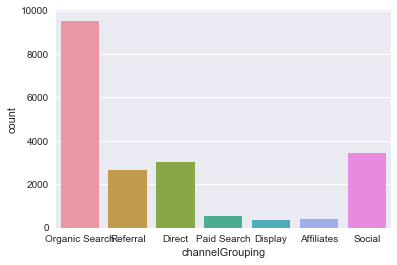

In [34]:
sns.countplot('channelGrouping',data=df1)

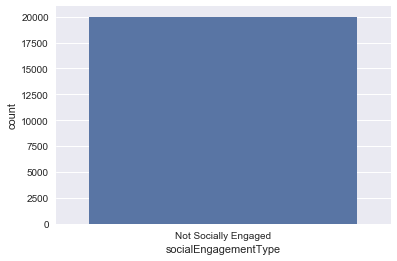

In [35]:
sns.countplot('socialEngagementType',data=df1)

Only Not Socially Engaged type is present. For prediction this field is a very good candidate to be droped.

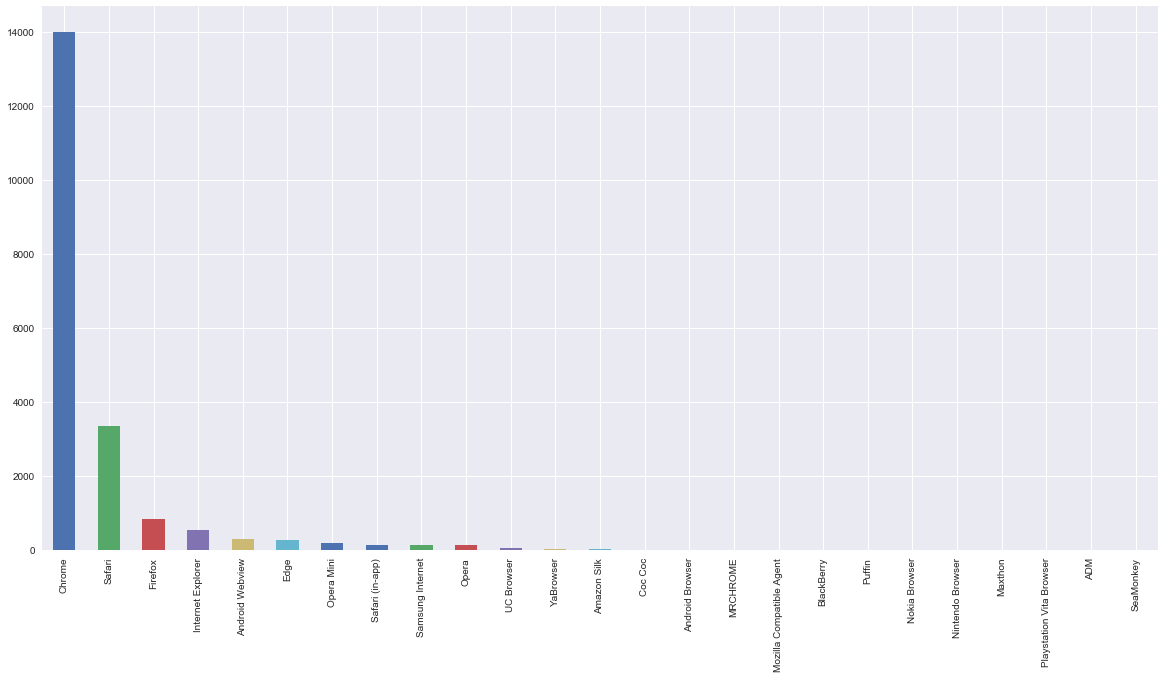

In [36]:
df1['device.browser'].value_counts().plot(kind='bar',figsize=(20,10))

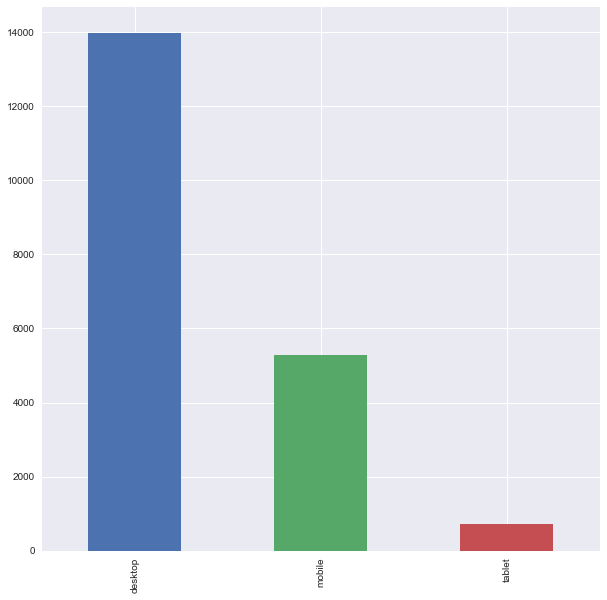

In [37]:
df1['device.deviceCategory'].value_counts().plot(kind='bar',figsize=(10,10))

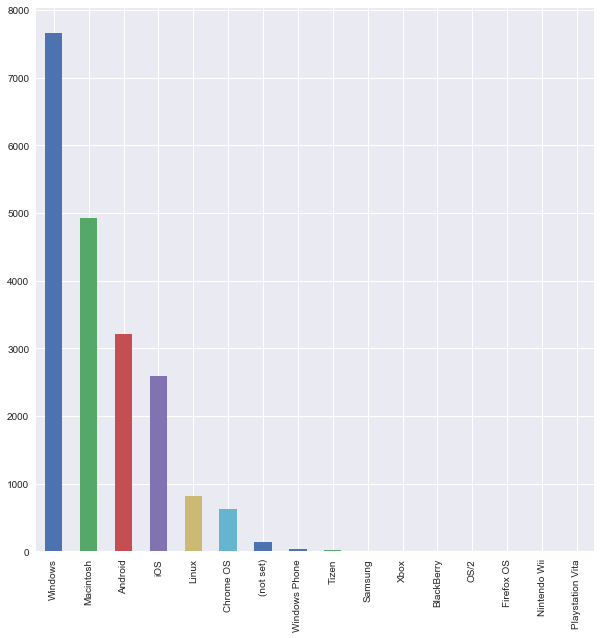

In [38]:
df1['device.operatingSystem'].value_counts().plot(kind='bar',figsize=(10,10))

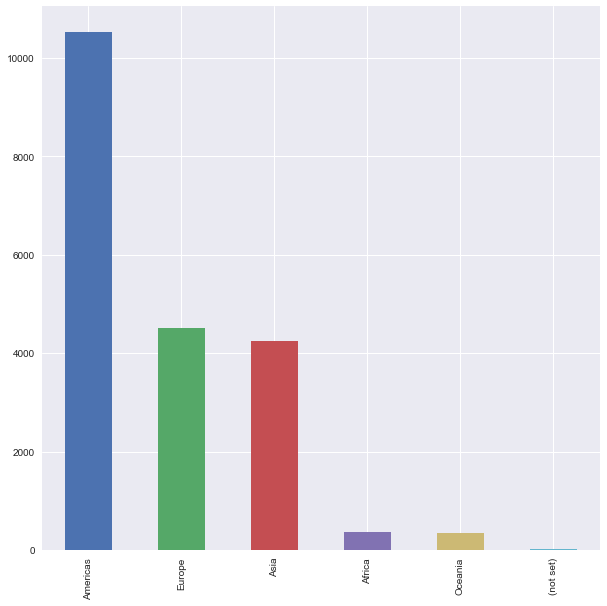

In [39]:
df1['geoNetwork.continent'].value_counts().plot(kind='bar',figsize=(10,10))

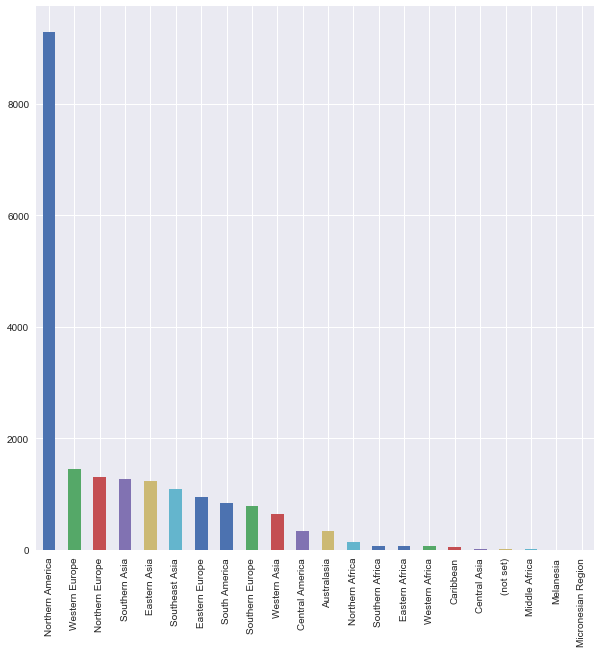

In [40]:
df1['geoNetwork.subContinent'].value_counts().plot(kind='bar',figsize=(10,10))

distribution of total revenue per user.

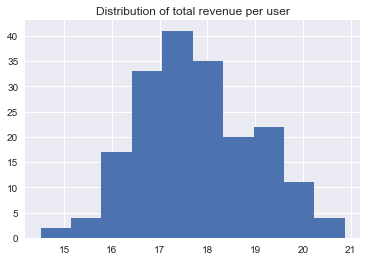

In [41]:
grouped = df1.groupby('fullVisitorId')['totals_transactionRevenue'].sum().reset_index()
grouped = grouped.loc[grouped['totals_transactionRevenue'].isna() == False]
plt.hist(np.log(grouped.loc[grouped['totals_transactionRevenue'] > 0, 'totals_transactionRevenue']));
plt.title('Distribution of total revenue per user');

In [42]:
counts = df2.loc[df2['totals_transactionRevenue'] > 0, 'fullVisitorId'].value_counts()
print('There are {0} paying users ({1} total) in data.'.format(len(counts), df2['fullVisitorId'].nunique()))
print('{0} users ({1:.4f}% of paying) have 1 paid transaction.'.format(np.sum(counts == 1), 100 * np.sum(counts == 1) / len(counts)))
print('{0} users ({1:.4f}% of paying) have 2 paid transaction.'.format(np.sum(counts == 2), 100 * np.sum(counts == 2) / len(counts)))
print('')
print('Count of non-zero transactions per user:')
counts.head(22)

There are 189 paying users (18384 total) in data.
185 users (97.8836% of paying) have 1 paid transaction.
4 users (2.1164% of paying) have 2 paid transaction.

Count of non-zero transactions per user:


463325773564352787     2
4064008221273566105    2
3102343581929921848    2
987390821892515431     2
5820498420449602355    1
1505936082836608918    1
309482894121265066     1
8287144117447582539    1
8530613607503742741    1
9393064695401243962    1
3798576854040953242    1
914215065327707355     1
7638336411447332495    1
9013296840842675812    1
4293841073200012958    1
3087800167641443127    1
16787854108283646      1
2875842843843422362    1
5410962620762283927    1
7187192533100162289    1
3508419666243874603    1
5327166854580374902    1
Name: fullVisitorId, dtype: int64

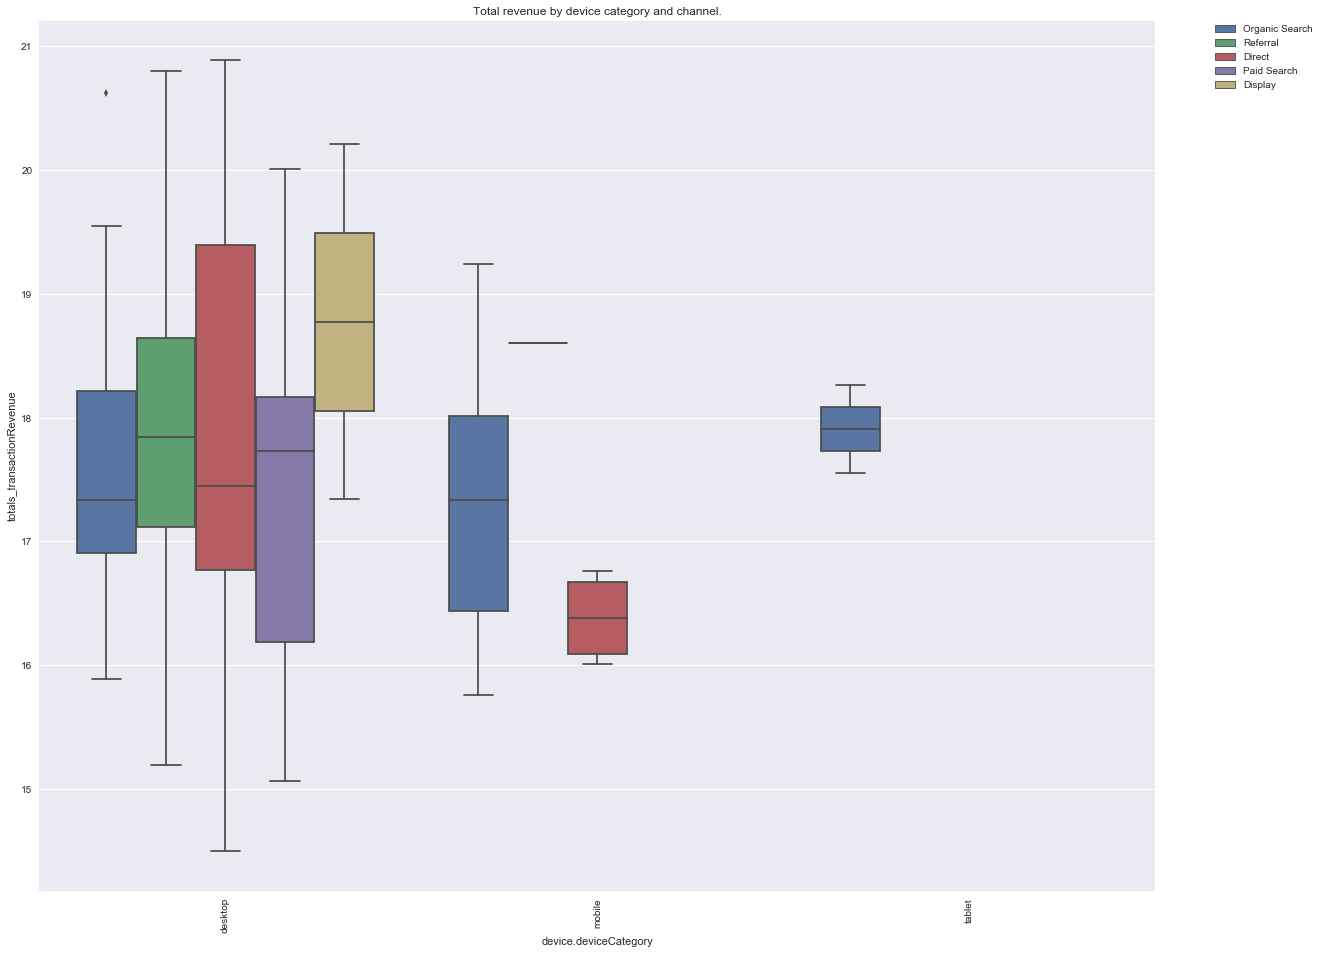

In [43]:
df2['totals_transactionRevenue'] = df2['totals_transactionRevenue'].fillna(0)
df2['totals_transactionRevenue'] = np.log1p(df2['totals_transactionRevenue'])
sns.set(rc={'figure.figsize':(20, 16)})
df2_ = df2.loc[df2['totals_transactionRevenue'] > 0.0]
sns.boxplot(x="device.deviceCategory", y="totals_transactionRevenue", hue="channelGrouping",  data=df2_)
plt.title("Total revenue by device category and channel.");
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

From above we can see that revenue comes mostly from desktops. Social, Affiliates and others aren't as profitable as other channels.

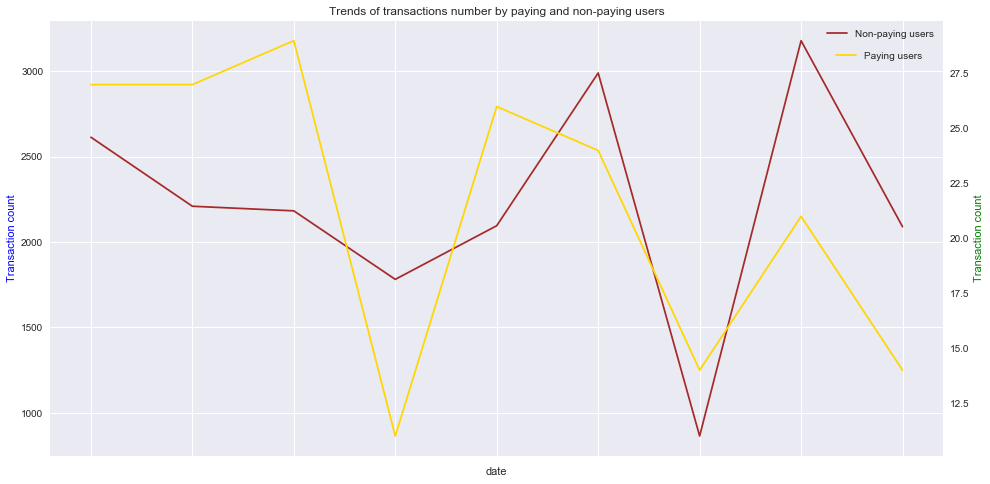

In [44]:
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of transactions number by paying and non-paying users");
df2.groupby(['date'])['totals_transactionRevenue'].count().plot(color='brown')
ax1.set_ylabel('Transaction count', color='b')
plt.legend(['Non-paying users'])
ax2 = ax1.twinx()
df2_ = df2.loc[df2['totals_transactionRevenue'] > 0.0]
df2_.groupby(['date'])['totals_transactionRevenue'].count().plot(color='gold')
ax2.set_ylabel('Transaction count', color='g')
plt.legend(['Paying users'], loc=(0.875, 0.9))
plt.grid(False)

Devices
Let's see which devices bring most revenue!

Mean revenue per transaction


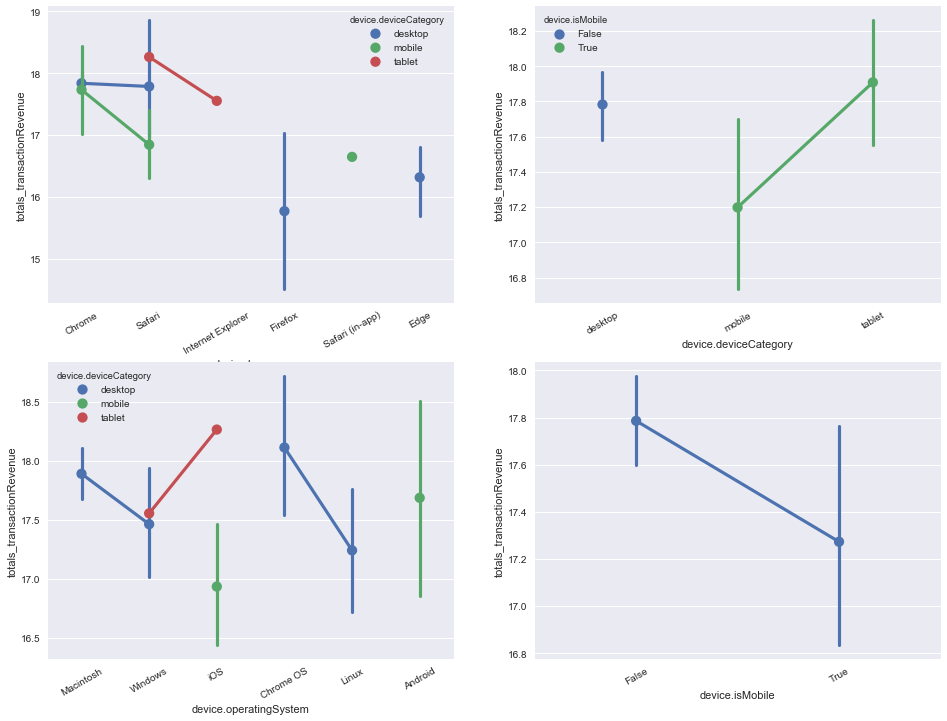

In [45]:
fig, ax = plt.subplots(2, 2, figsize = (16, 12))
print('Mean revenue per transaction')
sns.pointplot(x="device.browser", y="totals_transactionRevenue", hue="device.deviceCategory", data=df2_, ax = ax[0, 0]);
sns.pointplot(x="device.deviceCategory", y="totals_transactionRevenue", hue="device.isMobile", data=df2_, ax = ax[0, 1]);
sns.pointplot(x="device.operatingSystem", y="totals_transactionRevenue", hue="device.deviceCategory", data=df2_, ax = ax[1, 0]);
sns.pointplot(x="device.isMobile", y="totals_transactionRevenue", data=df2_, ax = ax[1, 1]);
ax[0, 0].xaxis.set_tick_params(rotation=30);
ax[0, 1].xaxis.set_tick_params(rotation=30);
ax[1, 0].xaxis.set_tick_params(rotation=30);
ax[1, 1].xaxis.set_tick_params(rotation=30);

It seems that - 
devices on Chrome OS, Android and Macs bring most profit.
devices on Chrome and safari browsers bring most profit.
Mobility in device brings most revenue.


### Checking for the constant columns i.e all the rows with single value and dropping them from the Data frame as they hold very less significance for the predictions.

In [46]:
const_cols = [c for c in df1.columns if df1[c].nunique(dropna=False)==1 ]
const_cols

['socialEngagementType',
 'totals_visits',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [47]:
df1.drop(['socialEngagementType',
 'totals_visits',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'trafficSource.adwordsClickInfo.criteriaParameters'],axis=1,inplace=True)

In [48]:
df1.fillna(0, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 45 columns):
channelGrouping                                 20000 non-null object
date                                            20000 non-null object
fullVisitorId                                   20000 non-null object
visitId                                         20000 non-null int64
visitNumber                                     20000 non-null int64
visitStartTime                                  20000 non-null int64
totals_bounces                                  20000 non-null float64
totals_hits                                     20000 non-null int64
totals_newVisits                                20000 non-null float64
totals_pageviews                                20000 non-null float64
totals_sessionQualityDim                        20000 non-null float64
totals_timeOnSite                               20000 non-null float64
totals_totalTransactionRevenue                  20

#### Looked for the significant columns for the predictions and dropped the remaining from the data frame

In [49]:
df1.drop(['date','visitId','fullVisitorId','visitNumber','visitStartTime','totals_timeOnSite','device.browser',                                  
'device.deviceCategory',                           
'device.isMobile',                                 
'device.operatingSystem',                          
'geoNetwork.city',                                 
'geoNetwork.continent',                            
'geoNetwork.country',                              
'geoNetwork.metro',                                
'geoNetwork.networkDomain',                        
'geoNetwork.region',                               
'geoNetwork.subContinent','customDimensions.index','trafficSource.adContent',                         
'trafficSource.adwordsClickInfo.adNetworkType',    
'trafficSource.adwordsClickInfo.gclId',            
'trafficSource.adwordsClickInfo.isVideoAd',        
'trafficSource.adwordsClickInfo.page',             
'trafficSource.adwordsClickInfo.slot',             
'trafficSource.campaign',                          
'trafficSource.isTrueDirect',                      
'trafficSource.keyword',                           
'trafficSource.medium',                            
'trafficSource.referralPath',                      
'trafficSource.source'],axis=1,inplace=True)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
channelGrouping                   20000 non-null object
totals_bounces                    20000 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  20000 non-null float64
totals_pageviews                  20000 non-null float64
totals_sessionQualityDim          20000 non-null float64
totals_totalTransactionRevenue    20000 non-null float64
totals_transactionRevenue         20000 non-null float64
totals_transactions               20000 non-null float64
customDimensions.value            20000 non-null object
affiliation                       20000 non-null object
localProductRevenue               20000 non-null int64
productRevenue                    20000 non-null int64
transactionRevenue                20000 non-null int64
transactionShipping               20000 non-null int64
dtypes: float64(7), int64(5), object(3)
memory us

In [51]:
df1['affiliation'].value_counts()
df1['affiliation'].replace(["Google Merchandise Store"], 1, inplace=True)

#### Encoding the categorical columns into numerical values using the get dummies function which by default follows the one hot encoding

In [52]:
df1['channelGrouping','customDimensions.value'] = df1.index
df1 = pd.get_dummies(df1, columns=['channelGrouping','customDimensions.value'])

In [53]:
df1.drop(df1.columns[13], axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
totals_bounces                            20000 non-null float64
totals_hits                               20000 non-null int64
totals_newVisits                          20000 non-null float64
totals_pageviews                          20000 non-null float64
totals_sessionQualityDim                  20000 non-null float64
totals_totalTransactionRevenue            20000 non-null float64
totals_transactionRevenue                 20000 non-null float64
totals_transactions                       20000 non-null float64
affiliation                               20000 non-null int64
localProductRevenue                       20000 non-null int64
productRevenue                            20000 non-null int64
transactionRevenue                        20000 non-null int64
transactionShipping                       20000 non-null int64
channelGrouping_Affiliates                20000 non-null u

## As we are predicting the target column (total transaction revenue) which consists of continous data. So the best evaluation strategy would be using RMSE(RootMean squareError) as the problem is a regression one.
#### R-Square(Coefficent of Determiniation) tells us proportion of variance explained and it is not a good metrics in our case, as our target has mostly 0's and just 0.96% of values. Model will be underfitted and show very low accuraccy

#### RMSE is always positive as error is squared and tells us on average by how much we missed predicting the correct value.

In [54]:
from sklearn.model_selection import train_test_split #training and testing data split

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Spliting dataset into train and test dataset.

In [137]:
Y =  df1['totals_transactionRevenue']
X = df1.drop(['totals_transactionRevenue'], axis = 1)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
X.shape
Y.shape

(20000, 25)


(20000,)

#### I decided to go for the MinMaxScaler for the scaling as we have mostly binary categorical data and continous data in the columns. So its best to scale or transform the data in the range of (0-1)
This transformation is often used as an alternative to zero mean, unit variance scaling.

In [139]:
from sklearn.preprocessing import MinMaxScaler  #This transformation is often used as an alternative to zero mean, unit variance scaling.
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Supervised learning models :
### 1) RandomForestRegressor
###  2) GradientBoostingRegressor
### 3) SupportVectorRegressor(SVR)

# 1) RandomForestRegressor

In [140]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=500)
regr.fit(X_train, y_train)
print(regr.feature_importances_)


[0.00000000e+00 1.15621850e-02 1.42507540e-04 1.06594718e-02
 6.42906934e-04 2.99806521e-01 1.14948513e-03 1.23261949e-06
 1.89991889e-01 1.99103866e-01 2.74019613e-01 6.25977877e-03
 0.00000000e+00 3.97061308e-03 4.56431325e-05 1.62476964e-03
 6.51463135e-05 9.39232284e-04 0.00000000e+00 5.83483227e-07
 0.00000000e+00 0.00000000e+00 7.86957527e-06 6.68659163e-06
 0.00000000e+00]


In [58]:
predict1 = regr.predict(X_test)

In [217]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, predict1)
print(r2_score(y_test,predict1))

-0.0023680483552779297


In [60]:
print(np.sqrt(mse))

3741836.06549288


# GradientBoostingRegressor

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
regr = GradientBoostingRegressor(max_depth=10, random_state=0, n_estimators=500)
regr.fit(X_train, y_train)
print(regr.feature_importances_)

[3.38729930e-18 3.27940819e-03 4.06205218e-06 3.29224434e-03
 2.37654603e-04 2.28484306e-01 2.06154414e-03 0.00000000e+00
 2.30137058e-02 1.85407384e-02 1.94024285e-01 6.18600311e-04
 0.00000000e+00 3.78766660e-04 8.65545805e-06 3.30190884e-04
 1.67330204e-06 1.71718984e-03 0.00000000e+00 5.34234596e-08
 0.00000000e+00 0.00000000e+00 6.63612801e-06 2.84680008e-07
 0.00000000e+00]


In [62]:
predict1 = regr.predict(X_test)
mse = mean_squared_error(y_test, predict1)
print(np.sqrt(mse))

5997428.049123916


# SupportVectorRegressor(SVR)

In [63]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

clf = SVR(gamma=0.0001, C=2.0, epsilon=0.2)
clf.fit(X_train, y_train)


SVR(C=2.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [64]:
predict1 = clf.predict(X_test)
mse = mean_squared_error(y_test, predict1)
print(np.sqrt(mse))

16864107.91333343


## Unsupervised learning models:
### 1) KMeans Clustering
### 2) GaussianMixture

# KMeans Clustering

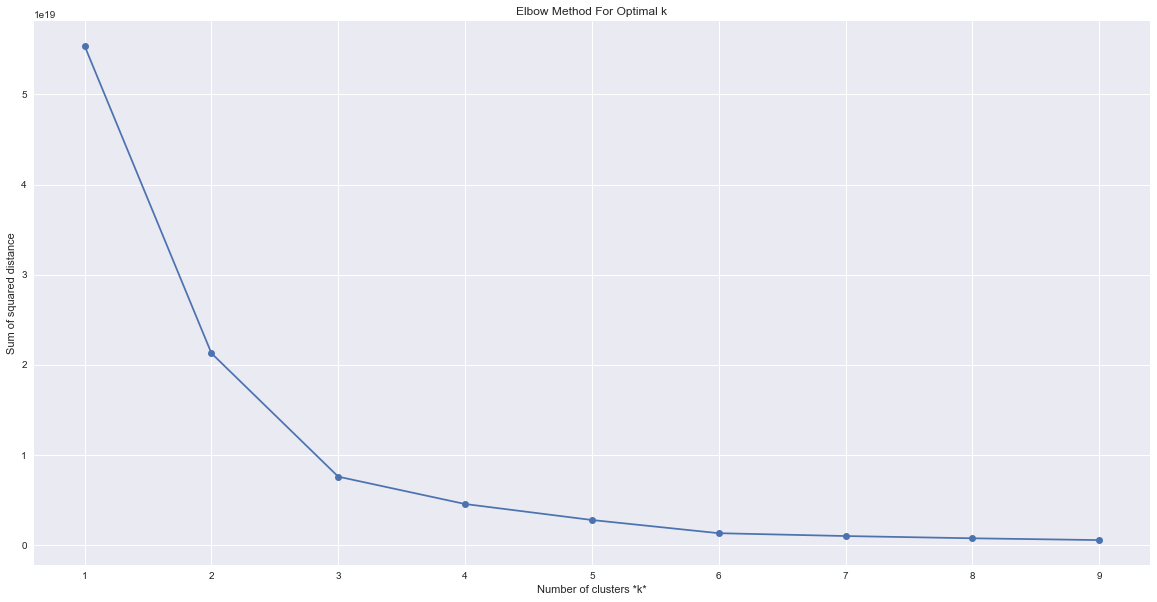

In [122]:
from sklearn.cluster import KMeans
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(20, 10))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method For Optimal k')
plt.show()

### From the above Elbow plot, I decided to put 3 clusters

In [123]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [124]:
x=pd.Series(kmeans.labels_)
x.value_counts()

0    19963
1       34
2        3
dtype: int64

In [228]:
print("Centroid for transactionRevenue for cluster 1: ",kmeans.cluster_centers_[:,10][0])
print("Centroid for transactionRevenue for cluster 2: ",kmeans.cluster_centers_[:,10][1])
print("Centroid for transactionRevenue for cluster 3: ",kmeans.cluster_centers_[:,10][2])

Centroid for transactionRevenue for cluster 1:  395973.5510694785
Centroid for transactionRevenue for cluster 2:  345585588.2352941
Centroid for transactionRevenue for cluster 3:  1679456666.6666667


# GaussianMixture

In [222]:
from sklearn.mixture import GaussianMixture                      # 1. Choose the model class
model = GaussianMixture(n_components=3)                      # 2. Instantiate the model with hyperparameters
model.fit(X)                                                # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X)  

#### Seeing the model score( per-sample average log-likelihood of the given data) the GaussianMixture is not a good model to cluster the data points accurately for our data.

In [223]:
model.score(X)

73.32481819575227

In [230]:
#transactionRevenue
print("Centroid for transactionRevenue for cluster 1: ",model.means_[:,10][0])
print("Centroid for transactionRevenue for cluster 2: ",model.means_[:,10][1])
print("Centroid for transactionRevenue for cluster 3: ",model.means_[:,10][2])

Centroid for transactionRevenue for cluster 1:  0.0
Centroid for transactionRevenue for cluster 2:  0.0012334892780505977
Centroid for transactionRevenue for cluster 3:  3.895004579302013e-05


#### Out of the two clustering models k-means perform better than GaussianMixture(looking at the transactionRevenue column). This is because in the k-means centroids are farther among themselvs compare to GaussianMixture.

## Unsupervised learning models, dimensionality reduction:
### 1) PCA(principal component analysis)
### 2) RFE (Recursive Feature Elimination)
### 3) FastICA

# PCA(principal component analysis)

In [171]:
from sklearn.decomposition import PCA
pca1 = PCA(8)
pca1.fit(X)
X_pca = pca1.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (20000, 25)
transformed shape: (20000, 8)


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.33, random_state=1)

regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=500)
regr.fit(X_train, y_train)
print(regr.feature_importances_)
predict1 = regr.predict(X_test)

mse = mean_squared_error(y_test, predict1)
print(mse)
print(np.sqrt(mse))

[0.19431344 0.34210424 0.0663953  0.05329853 0.05222881 0.06110466
 0.08880035 0.14175467]
289283904715378.25
17008348.08896438


In [173]:
regr = GradientBoostingRegressor(max_depth=10, random_state=0, n_estimators=500)
regr.fit(X_train, y_train)
predict1 = regr.predict(X_test)
mse = mean_squared_error(y_test, predict1)
print(mse)
print(np.sqrt(mse))


509322698509969.56
22568178.892191757


In [174]:
clf = SVR(gamma=0.0001, C=2.0, epsilon=0.2)
clf.fit(X_train, y_train)
predict1 = clf.predict(X_test)
mse = mean_squared_error(y_test, predict1)
print(mse)
print(np.sqrt(mse))


284398328763245.94
16864113.637047336


### RMSE for RandomForestReg before PCA: 3741836.06549288
### RMSE for RandomForestReg after PCA:  17008348.08896438
#### We can clearly see that our model is performing worse after Dimension reduction (PCA), Which means PCA captures just variance not the usefulness of a feature.
### RMSE for SVR beforePCA: 16864107.91333343
### RMSE for SVR after PCA:    16864113.637047336
####  For SVR there is not much change in model performance before and after PCA.
### RMSE for GradientBoostingRegressor beforePCA: 5997428.049123916
### RMSE for GradientBoostingRegressor after PCA:   22568178.892191757
####  For GradientBoostingRegressor model performed worst after PCA.

# RFE (Recursive Feature Elimination)

In [178]:
from sklearn.feature_selection import RFE
RFG = RandomForestRegressor()
rfe = RFE(RFG, 10)
rfe = rfe.fit_transform(X,Y)

In [185]:
X_RFE=pd.DataFrame(rfe)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X_RFE, Y, test_size=0.33, random_state=1)

regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=500)
regr.fit(X_train, y_train)
print(regr.feature_importances_)
predict1 = regr.predict(X_test)

mse = mean_squared_error(y_test, predict1)
print(mse)
print(np.sqrt(mse))

[0.0127483  0.00036799 0.01141235 0.00161452 0.32105908 0.00206577
 0.18651549 0.17045941 0.28629616 0.00746093]
12588026837963.932
3547960.9408734944


In [187]:
regr = GradientBoostingRegressor(max_depth=10, random_state=0, n_estimators=500)
regr.fit(X_train, y_train)
predict1 = regr.predict(X_test)
mse = mean_squared_error(y_test, predict1)
print(mse)
print(np.sqrt(mse))

31317005304303.676
5596159.8712245235


In [188]:
clf = SVR(gamma=0.0001, C=2.0, epsilon=0.2)
clf.fit(X_train, y_train)
predict1 = clf.predict(X_test)
mse = mean_squared_error(y_test, predict1)
print(mse)
print(np.sqrt(mse))

284398328744741.25
16864113.636498697


### RMSE for RandomForestReg before RFE: 3741836.06549288
### RMSE for RandomForestReg after RFE:    3547960.9408734944
#### We can clearly see that our model is performing better after RFE, Which means RFE captures some usefulness of features.
### RMSE for SVR before RFE:   16864107.91333343
### RMSE for SVR after RFE:      16864113.636498697
####  For SVR there is not much change in model performance before and after RFE.
### RMSE for GradientBoostingRegressor before RFE: 5997428.049123916
### RMSE for GradientBoostingRegressor after RFE:    5596159.8712245235 
#### For GradientBoostingRegressor there is not much change in model performance before and after RFE.

# FastICA

In [206]:
from sklearn.decomposition import FastICA
# Compute ICA
ica = FastICA(n_components=8)
X_ica = ica.fit_transform(X)  # Reconstruct signals

In [209]:
X_ica = pd.DataFrame(X_ica)

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X_ica, Y, test_size=0.33, random_state=1)

regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=500)
regr.fit(X_train, y_train)
predict1 = regr.predict(X_test)

mse = mean_squared_error(y_test, predict1)
print(mse)
print(np.sqrt(mse))

216156299092559.88
14702254.898231084


In [213]:
regr = GradientBoostingRegressor(max_depth=10, random_state=0, n_estimators=500)
regr.fit(X_train, y_train)
predict1 = regr.predict(X_test)
mse = mean_squared_error(y_test, predict1)
print(mse)
print(np.sqrt(mse))

246408026746232.94
15697389.1697388


In [214]:
clf = SVR(gamma=0.0001, C=2.0, epsilon=0.2)
clf.fit(X_train, y_train)
predict1 = clf.predict(X_test)
mse = mean_squared_error(y_test, predict1)
print(mse)
print(np.sqrt(mse))

284398328763035.56
16864113.6370411


### RMSE for RandomForestReg before FastICA: 3741836.06549288
### RMSE for RandomForestReg after FastICA:    14702254.898231084
#### We can clearly see that our model is performing worst after FastICA, Which means FastICA does not capture usefulness of features just explains variance.
### RMSE for SVR before FastICA:   16864107.91333343
### RMSE for SVR after FastICA:      16864113.6370411
####  For SVR there is not much change in model performance before and after FastICA.
### RMSE for GradientBoostingRegressor before FastICA: 5997428.049123916
### RMSE for GradientBoostingRegressor after FastICA:    15697389.1697388
#### For GradientBoostingRegressor, We can clearly see that our model is performing worst after FastICA


# From above analysis we can conclude that RMSE for SVR almost remains same irrespective of dimensionality reduction.

# RMSE for RandomForestReg after RFE (dim reduction): 3547960.9408734944 gives the best result out of all the techniques applied above.